# References

- Murphy KP. Probabilistic machine learning: Advanced topics. MIT press; 2023 Aug 15.
- Bishop CM, Bishop H. Deep learning: Foundations and concepts. Springer Nature; 2023 Nov 1.
- https://pyro.ai
- https://www.cs.cmu.edu/~epxing/Class/10708-20/index.html
- Chandra R, Simmons J. Bayesian neural networks via MCMC: a Python-based tutorial. IEEE Access. 2024 May 15.
- https://www.youtube.com/playlist?list=PLJ71tqAZr196GJ5G36s64xifr1tURUCSJ

# Outline

- Introduction
- Exact inference
- Approximate inference
    - Monte carlo (MC) approximation
    - Markov chain Monte carlo (MCMC)
    - Variational inference (VI)
- Bayesian Neural network (BNN)
    - Monte carlo dropout
    - BNN with MCMC
    - BNN with VI
- Probabilistic programming tools


# Probabilistic inferences

Data science is rarely about certainties. We deal with noisy data, incomplete information, and inherent uncertainty in the real world. Probabilistic inference provides the tools to quantify and reason about this uncertainty, enabling us to make informed decisions even when things aren't clear-cut. It moves us beyond point estimates to understanding distributions and making predictions with confidence intervals. This is essential for real-world applications where risk assessment and understanding the range of possible outcomes are critical (e.g., medical diagnosis, financial forecasting, autonomous driving).

![image.png](images/uncer.png)

ref image: https://neurosciences.univ-grenoble-alpes.fr/en/news/uncertainty-quantification-deep-learning-based-medical-image-segmentation


# Introduction

In machine learning, when we deal with uncertainty (like future predictions, hidden information, or model settings), we use probabilities. We treat these uncertain things as a probability distribution.

***Inference*** is the process of computing the posterior distribution for these quantity conditioning on the data.

We can show from Bayes rule:


$$p(\theta | \mathcal{D}) = \frac{p(\theta)p(\mathcal{D}|\theta)}{p(\mathcal{D})}$$
$\theta$ is model parameters which is not known. $\mathcal{D}$ represent data which is known.

The main computational bottleneck is the denominator which required to solved the following high dimensional integral (**HARD**).

> $$p(\mathcal{D}) = \int p(\mathcal{D}|\theta)p(\theta)d \theta$$


> $$p(\mathcal{D}) = \int_{\theta_1} \int_{\theta_2} \int_{\theta_3} ... \ p(\mathcal{D}|\theta)p(\theta)d \theta_1 d \theta_2d \theta_3 \ ...$$

***Inference*** is the process of computing the posterior distribution for these quantity conditioning on the data.


## Type of inferences

#### Exact Inference
- Computing the exact posterior distribution using Bayes' rule.
- Analytical solutions

**Challenges**:
- Often intractable for complex models.
- Requires computing the marginal likelihood , which may involve high-dimensional integrals (**HARD**).

#### Approximate Inference
- Estimating the posterior distribution when exact inference is computationally infeasible.

**Challenges**:
- may introduce approximation errors.
- computationally expensive

# Exact inference


**Example algorithms**
- Brute-force
- Elimination algorithm

# Approximate inference


**Example algorithms**

- Monte carlo (MC)(sampling) approximation: Use sampling to approximate the probabilistic distribution.
- Markov chain Monte carlo (MCMC) approximation: Similar concept to MC approximation, but integrated by Markov chain when sampling.
- Variational inference (VI): VI try to approximate the distribution using analytic solution. However, VI try to relaxing the intractiable optimization problem.


## Monte carlo approximation

Monte Carlo approximation is a statistical method used to estimate numerical results through random sampling. 
It is widely used in various fields like finance, physics, and data science.



The expectation of a function $f(z)$ with respect to a probability distribution $p(z)$ is given by:

$$
E[f] = \int f(z)p(z) dz
$$

If $z$ is a discrete random variable, the integral is replaced by a summation. In practice, if direct computation of 
this expectation is infeasible, we can approximate it using Monte Carlo sampling. By drawing $L$ samples $z^{(l)}$
from $p(z)$, the expectation can be approximated as:

$$
E[f] \approx \frac{1}{L} \sum_{l=1}^L f(z^{(l)})
$$

This approximation is an unbiased estimator of the true expectation.

### Example: Approximating the Expectation

Approximates the expectation of $$f(z) = z^2$$ for z ~ Uniform(0, 1).

$$
E[f(z)] = ∫_{-∞}^{∞} f(z) * p(z) dz
$$


$$
E[z^2] = ∫_{0}^{1} z^2 dz = [z^3/3]_{0}^{1} = 1^3/3 - 0^3/3 = 1/3
$$

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def expectation_example(num_samples):

    # Generate random samples from Uniform(0, 1)
    z = np.random.uniform(0, 1, num_samples)
    # Compute f(z) = z^2 for each sample
    f_values = z**2
    # Calculate the mean of f(z) values
    expectation = np.mean(f_values)
    return expectation

# Number of samples for expectation approximation
num_samples = 100000
# Call the expectation function
estimated_expectation = expectation_example(num_samples)
actual_expectation = 1/3  # The exact expectation of z^2 under Uniform(0, 1)

print(f"Monte Carlo estimate of E[z^2] (using {num_samples} samples): {estimated_expectation}")
print(f"Actual value of E[z^2]: {actual_expectation}")

Monte Carlo estimate of E[z^2] (using 100000 samples): 0.33334475471464625
Actual value of E[z^2]: 0.3333333333333333


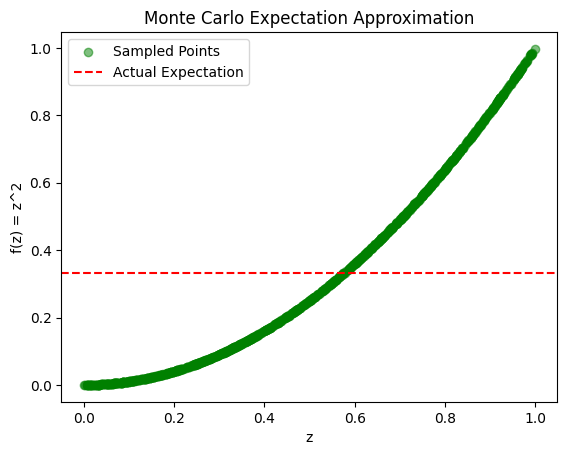

In [21]:
# Visualizing the expectation
samples = np.random.uniform(0, 1, 1_000)
f_values = samples**2

plt.figure()
# Scatter plot of sampled points
plt.scatter(samples, f_values, color='green', alpha=0.5, label='Sampled Points')
# Plot the actual expectation line
plt.axhline(actual_expectation, color='red', linestyle='--', label='Actual Expectation')
plt.title('Monte Carlo Expectation Approximation')
plt.xlabel('z')
plt.ylabel('f(z) = z^2')
plt.legend()
plt.show()

Mathematically, the Monte Carlo method relies on the Law of Large Numbers, which states that the average of results 
obtained from a large number of trials approaches the expected value as the number of trials increases.

![](images/ex1.png)

### Estimating Pi using Monte Carlo Simulation

To estimate Pi, we consider a unit circle inscribed in a square of side length 2. The area of the circle is $\pi r^2$,
and the area of the square is $4r^2$. Since $r = 1$, the ratio of the area of the circle to the square is $\pi/4$.
By randomly sampling points within the square and counting how many fall inside the circle, we can approximate $\pi$.


Animation

https://www.youtube.com/watch?v=ELetCV_wX_c

![mc_yt.png](images/mc_yt.png)

ref: https://www.youtube.com/watch?v=ELetCV_wX_c

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_pi(num_points):
    inside_circle = 0
    x_inside, y_inside = [], []
    x_outside, y_outside = [], []

    for _ in range(num_points):
        # Generate random (x, y) point within [-1, 1] x [-1, 1]
        x, y = np.random.uniform(-1, 1), np.random.uniform(-1, 1)
        # Check if point lies within the unit circle
        if x**2 + y**2 <= 1: # inside circle
            inside_circle += 1
            x_inside.append(x)
            y_inside.append(y)
        else: # outside circle
            x_outside.append(x)
            y_outside.append(y)
            
    # Estimate Pi using the ratio of points inside the circle to total points
    pi_estimate = (inside_circle / num_points) * 4
    return pi_estimate, x_inside, y_inside, x_outside, y_outside

num_points = 10_000
pi_estimate, x_inside, y_inside, x_outside, y_outside = estimate_pi(num_points)

print(f"Monte Carlo estimate of Pi (using {num_points} points): {pi_estimate}")

Monte Carlo estimate of Pi (using 10000 points): 3.1496


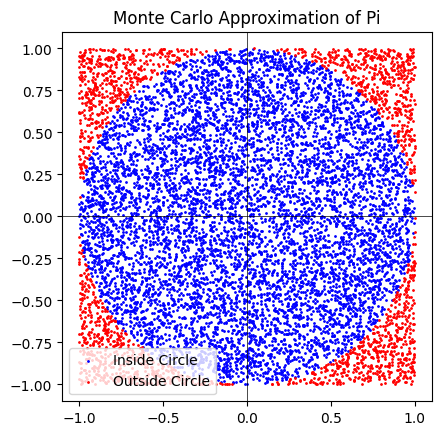

In [51]:
# Plotting
plt.figure()
# Plot points inside the circle
plt.scatter(x_inside, y_inside, color='blue', s=1, label='Inside Circle')
# Plot points outside the circle
plt.scatter(x_outside, y_outside, color='red', s=1, label='Outside Circle')
plt.gca().set_aspect('equal', adjustable='box')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title('Monte Carlo Approximation of Pi')
plt.legend()
plt.show()

### Importance Sampling
Importance sampling is a Monte Carlo method used to approximate integrals of the form:

$$
E[f(x)] = \int f(x) p(x) dx,
$$

where $f(x)$ is the target function, and $p(x)$ is the target distribution (often a conditional distribution).

Instead of sampling directly from $p(x)$ (which might be challenging), we sample from a simpler proposal distribution $q(x)$.

$$
\int f(x) p(x) dx = \int f(x) \frac{p(x)}{q(x)} q(x) dx,
$$

$$
\int f(x) p(x) dx = \int wf(x) q(x) dx,
$$

To adjust for the difference between $p(x)$ and $q(x)$, we associate weights with each sample, resulting in the weighted Monte Carlo approximation:

$$
E[f(x)] \approx \frac{1}{N} \sum_{n=1}^N w_n f(x_n),
$$

where the importance weights are defined as:

$$
w_n = \frac{p(x_n)}{q(x_n)}.
$$

This approach requires that $q(x) > 0$ wherever $p(x) > 0$.

![images/import.png](images/import.png)


In cases where the target distribution $p(x)$ is unnormalized, we use self-normalized importance sampling. 
This method estimates the expectation as a ratio of weighted sums, avoiding the need for the normalization constant $Z=\int \tilde{p}(x) dx$.

This can be derived from:

$$
E[f(x)] = \frac{\int f(x) \tilde{p}(x) dx}{\int \tilde{p}(x) dx} = \frac{\int f(x) \frac{\tilde{p}(x)}{q(x)} q(x) dx}{\int \frac{\tilde{p}(x)}{q(x)} dx} \approx \frac{\sum_{n=1}^N \tilde{w}_n f(x_n)}{\sum_{n=1}^N \tilde{w}_n},
$$

The expectation is approximated as:

$$
E[f(x)] \approx \frac{\sum_{n=1}^N \tilde{w}_n f(x_n)}{\sum_{n=1}^N \tilde{w}_n},
$$

where the unnormalized weights are defined as:

$$
\tilde{w}_n = \frac{\tilde{p}(x_n)}{q(x_n)}.
$$


This approach ensures that the estimate does not depend on the normalization constant of $p(x)$.

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

def self_normalized_importance_sampling(f, unnormalized_p, q, q_sample, num_samples):

    # Draw samples from the proposal distribution
    samples = q_sample(num_samples)
    # Compute unnormalized weights
    unnormalized_weights = unnormalized_p(samples) / q(samples)
    # Normalize the weights
    normalized_weights = unnormalized_weights / np.sum(unnormalized_weights)
    # Compute the weighted expectation
    expectation = np.sum(normalized_weights * f(samples))
    return expectation, normalized_weights, samples

# Define unnormalized target and proposal distributions
unnormalized_p = lambda x: np.exp(-x**2 / 2)  # Unnormalized standard normal distribution

rate = 1
q = lambda x: expon.pdf(x, scale=1/rate) * (x >= 0)  # PDF of Exponential distribution
q_sample = lambda n: expon.rvs(scale=1/rate, size=n) # Sampling from the exponential distribution

# q = lambda x: np.exp(-x) * (x >= 0)  # PDF of Exponential distribution with lambda=1
# q_sample = lambda n: np.random.exponential(1, n)  # Sampling from the exponential distribution
f = lambda x: x**2  # Function to compute expectation

# Number of samples
num_samples = 10_000

# Perform self-normalized importance sampling
estimated_expectation, normalized_weights, samples = self_normalized_importance_sampling(f, unnormalized_p, q, q_sample, num_samples)

# Analytical expectation of x^2 under standard normal
actual_expectation = 1  # Variance of standard normal distribution

print(f"Estimated expectation using self-normalized importance sampling: {estimated_expectation}")
print(f"Actual expectation: {actual_expectation}")

Estimated expectation using self-normalized importance sampling: 0.9796818166380781
Actual expectation: 1


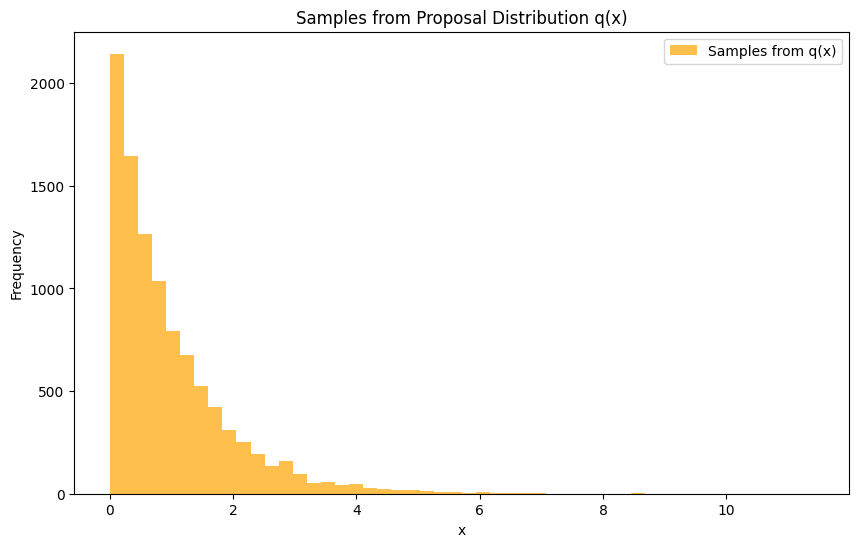

In [55]:


# Visualizing the samples
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, color='orange', alpha=0.7, label='Samples from q(x)')
plt.title('Samples from Proposal Distribution q(x)')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Markov chain Monte carlo (MCMC)

Introduction to MCMC:
Markov Chain Monte Carlo (MCMC) methods are a class of algorithms used to sample from high-dimensional probability distributions.
Unlike non-iterative methods like MC such as importance sampling, MCMC constructs a Markov chain whose stationary
distribution is the target distribution $p(x) = \frac{\tilde{p}(x)}{Z_p}$, $Z_p$ may be unknown. By performing a random walk on the state space, the algorithm generates samples that can be used for Monte Carlo integration.



#### MCMC vs MC


Imagine you want to estimate the average height of people in a large city.

MC: You randomly select location from the map go to that place and measure a person height. You go back home, randomly select location again. This is analogous to standard MC, where you directly sample from the population. Sometime you get the city that have low population, you may get less sample.

MCMC: This is where the "walking" comes in, but it needs to be more specific.  Imagine you have a way to define "neighbors" in the city.  Maybe people who live on the same street, or in the same apartment building, or who frequent the same park are considered neighbors.

1. You start with a random location.
2. You measure the height
3. You then randomly choose one of their "neighbors."
4. You measure the height of that neighbor.
5. You then randomly choose a neighbor of that person, and so on.

The "walk" is the sequence of neighbor selections.  It's a Markov chain because the next person you sample only depends on the current person (not on the entire history of your walk).




Key concepts in MCMC:

- Correlated samples: Unlike independent samples in other methods, MCMC produces dependent samples. Each sample depends on the previous one, introducing a "memory" into the process
- Mixing time or Burn-in time: The time it takes for the Markov chain to reach its stationary distribution, the target distribution $p(x)$ that we aim to sample from.

https://www.youtube.com/watch?v=OTO1DygELpY

![mcmc1.png](images/mcmc1.png)

Dong T, An D, Kim NH. Prognostics 102: efficient Bayesian-based prognostics algorithm in Matlab. Fault Detection, Diagnosis and Prognosis. 2019 Feb 20:5-25.



**Advantages:**

- Handles complex distributions: MCMC can be used to sample from probability distributions that are difficult or impossible to sample from directly. This is especially useful in Bayesian statistics where the posterior distribution can be very complex.
- Explores complex spaces: The "walking" behavior of MCMC allows it to explore complex, high-dimensional spaces **more effectively** than simple random sampling.

**Disadvantages:**
- Sample dependence: The samples from MCMC are not independent, which can complicate statistical analysis. You have to account for the correlation between samples.
- Convergence: A crucial issue is ensuring that the Markov chain has "converged" to the target distribution. This means that after a certain number of steps, the samples are actually representative of the distribution you want to sample from. Checking for convergence can be tricky.
- Tuning: MCMC methods often have parameters that need to be tuned (e.g., the "step size" of the walk). Poorly tuned parameters can lead to inefficient sampling or incorrect results.
- More complex to implement: MCMC algorithms are generally more complex to implement than basic MC methods.

### Metropolis-Hastings Algorithm

The Metropolis-Hastings Algorithm:
The Metropolis-Hastings (MH) algorithm is one of the simplest and most widely used MCMC methods. It generates samples by 
iteratively proposing a new state $x'$ based on the current state $x$ and accepting or rejecting it based on the acceptance probability.

> **_NOTE:_** Key steps in the MH algorithm: 
> 1. Propose a new state $x'$ from a proposal distribution $q(x'|x)$.
> 2. Compute the acceptance probability $A$:
>   - If $q(x'|x)$ is symmetric ($q(x|x')=q(x'|x)$):
>      $$
>       A = \min \left( 1, \frac{\tilde{p}(x')}{\tilde{p}(x)} \right)
>      $$
>    - If $q(x'|x)$ is asymmetric:
>      $$
>      A = \min \left( 1, \frac{\tilde{p}(x') q(x|x')}{\tilde{p}(x) q(x'|x)} \right)
>      $$
> 3. Accept or reject the proposal:
>    - Accept $x'$ with probability $A$.
>    - Otherwise, stay at the current state $x$.

https://www.youtube.com/watch?v=OTO1DygELpY


**Why is MH Useful?**

* **Handles complex distributions:** MH can be used to sample from virtually any distribution, as long as we can evaluate its (unnormalized) probability density.
* **Flexibility:** The choice of proposal distribution allows us to control how we explore the state space.


![images/mcmc.png](images/mcmc.png)

Jin SS, Ju H, Jung HJ. Adaptive Markov chain Monte Carlo algorithms for Bayesian inference: recent advances and comparative study. Structure and Infrastructure Engineering. 2019 Nov 2;15(11):1548-65.

C:\Users\dream\AppData\Local\Temp\ipykernel_2392\432652904.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  acceptance_ratio = target_pdf(proposed_sample) / target_pdf(current_sample) * \


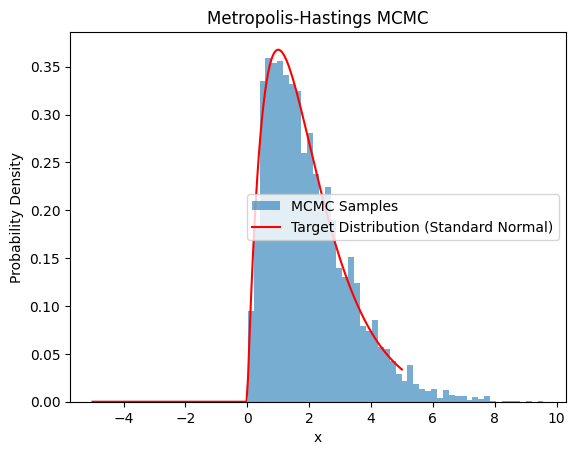

Mean of samples after burn-in: 1.9863468947712293
Standard deviation of samples after burn-in: 1.3404811305563398


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm  # For the target distribution (Gaussian)
from scipy.stats import gamma  

def metropolis_hastings(target_pdf, proposal_pdf, proposal_sample, initial_sample, num_samples):


    samples = np.zeros(num_samples)
    current_sample = initial_sample
    samples[0] = current_sample

    for i in range(1, num_samples):
        # 1. Propose a new sample from the proposal distribution
        proposed_sample = proposal_sample(current_sample)

        # 2. Calculate the acceptance probability (A)
        acceptance_ratio = target_pdf(proposed_sample) / target_pdf(current_sample) * \
                           proposal_pdf(current_sample - proposed_sample) / proposal_pdf(proposed_sample - current_sample)  # Note the order in proposal pdf
        A = min(1, acceptance_ratio)  # Acceptance probability

        # 3. Accept or reject the proposed sample
        if np.random.rand() < A:  # Generate a random number between 0 and 1
            current_sample = proposed_sample # Accept
        # else: current_sample = current_sample # reject, which we dont need since we already assign current_sample to samples[i]

        samples[i] = current_sample # either accept or reject, current_sample is assigned to samples[i]

    return samples


# Example usage:
# Target distribution: Standard normal (mean=0, std_dev=1)
target_pdf = lambda x: gamma.pdf(x, a=2.0, scale=1.0) * (x >= 0)

# Proposal distribution: Normal centered at the current sample (adjust std_dev for tuning)
proposal_std_dev = 1.0  # Tune this!
proposal_pdf = lambda x: norm.pdf(x, loc=0, scale=proposal_std_dev)  # Center at 0 for simplicity in this example
proposal_sample = lambda x: np.random.normal(loc=x, scale=proposal_std_dev) # Center at current sample x

# Initial sample
initial_sample = 0.0

# Number of samples
num_samples = 10000

# Run the MCMC sampler
samples = metropolis_hastings(target_pdf, proposal_pdf, proposal_sample, initial_sample, num_samples)

# Burn-in period (discard the initial samples as they might not be from the target distribution)
burn_in = 1000
samples_after_burnin = samples[burn_in:]

# Plot the results
plt.hist(samples_after_burnin, bins=50, density=True, alpha=0.6, label="MCMC Samples")

# Plot the target distribution for comparison
x_values = np.linspace(-5, 5, 200)
plt.plot(x_values, target_pdf(x_values), 'r-', label="Target Distribution (Standard Normal)")

plt.legend()
plt.title("Metropolis-Hastings MCMC")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.show()

# Print some statistics
print(f"Mean of samples after burn-in: {np.mean(samples_after_burnin)}")
print(f"Standard deviation of samples after burn-in: {np.std(samples_after_burnin)}")



### Gibbs Sampling

**What is Gibbs Sampling?**

Gibbs sampling is another powerful and widely used Markov Chain Monte Carlo (MCMC) method. Unlike Metropolis-Hastings, which proposes new states and then accepts or rejects them, Gibbs sampling *directly samples* from the *conditional distributions* of each variable, one at a time, while holding the others fixed. This makes it particularly effective for high-dimensional problems where it's easier to sample from the conditional distributions than the joint distribution directly.

**Core Idea:**

Imagine you have a joint distribution  $p(x_1, x_2,..., x_n)$.  Gibbs sampling works by iteratively sampling from the *conditional* distributions:

1. Sample $x_1$ from $p(x_1 | x_2, x_3,..., x_n)$
2. Sample $x_2$ from $p(x_2 | x_1, x_3,..., x_n)$
3. Sample $x_3$ from $p(x_3 | x_1, x_2,..., x_n)$... and so on, cycling through all the variables.

> **The Algorithm:** 
> 1. **Initialization:** Start with an initial state $(x_1^0, x_2^0,..., x_n^0)$.
> 2. **Iteration (for t = 1, 2,..., num_samples):**
>    - Sample $x_1^t$ from $p(x_1 | x_2^{t-1}, x_3^{t-1},..., x_n^{t-1})$
>    - Sample $x_2^t$ from $p(x_2 | x_1^t, x_3^{t-1},..., x_n^{t-1})$  (Note: using the *updated* $x_1^t$)
>    - Sample $x_3^t$ from $p(x_3 | x_1^t, x_2^t,..., x_n^{t-1})$ (Note: using the *updated* $x_1^t$ and $x_2^t$)
>    - ...
>    - Sample $x_n^t$ from $p(x_n | x_1^t, x_2^t,..., x_{n-1}^t)$
> 3. **Result:** The sequence of states $(x_1^t, x_2^t,..., x_n^t)$ for t = 1, 2,..., num_samples forms a Markov chain whose stationary distribution is the target joint distribution $p(x_1, x_2,..., x_n)$.

**Why Gibbs Sampling is Useful:**

* **Simpler than MH:**  No need to tune a proposal distribution or calculate acceptance probabilities.  Sampling from conditional distributions is often easier.
* **Effective for high dimensions:**  Breaks down the complex joint sampling problem into simpler conditional sampling steps.

**When Gibbs Sampling is Applicable:**

Gibbs sampling is most effective when:

* The *full conditional distributions* $p(x_i | x_j \text{ for } j\neq i)$ are known and easy to sample from.
* The joint distribution is complex and difficult to sample from directly.



## Summary MC and MCMC

MC methods are widely used for simpler problems. MCMC methods are significantly more common in advanced applications, particularly in fields like Bayesian statistics, machine learning, and complex simulations.

### Others (but Importance and Common) MCMC Methods

- **Hamiltonian Monte Carlo (HMC)**: HMC leverages principles from physics, specifically Hamiltonian dynamics, to efficiently explore complex probability distributions. Instead of randomly sampling from a proposal distribution, HMC uses gradients of the target distribution to guide its exploration, allowing it to navigate complex energy landscapes more effectively and avoid getting trapped in local optima. This "guided" exploration often leads to faster convergence and better mixing compared to methods that rely on random proposals.
- **No-U-Turn Sampler (NUTS)**: NUTS is an adaptive extension of HMC that automates the tuning of crucial parameters like the integration time and step size.  It eliminates the need for manual tuning by automatically determining how long to run the Hamiltonian dynamics simulation, preventing the sampler from making "U-turns" and retracing its steps. This automation makes HMC easier to use and more robust, especially for complex problems.  NUTS is often the preferred choice when using HMC.


## Variational inference (VI)

**Introduction to Variational Inference**:
- Goal: Approximate an intractable posterior distribution \( p(z|x) \) with a simpler variational distribution \( q(z) \).
- Key Idea: Transform Bayesian inference into an optimization problem by minimizing the Kullback-Leibler (KL) divergence:

  $$ q^* = \arg\min_{q \in Q} D_{KL}(q(z) || p(z|x)) $$

  https://www.youtube.com/watch?v=A9WmgK9qpm0&list=PLJ71tqAZr196GJ5G36s64xifr1tURUCSJ&index=1

![vi1.png](images/vi1.png)





### The Objective:
- The KL divergence is defined as:
  $$ D_{KL}(q(z) || p(z|x)) = \mathbb{E}_q [ \log \frac{q(z)}{p(z|x)} ] $$


- Expanding and rearranging terms gives the Evidence Lower Bound (ELBO):

$$\begin{split} 
D_{KL}(q(z) || p(z|x)) &= \mathbb{E}_q[\log q(z)] - \mathbb{E}_q[\log p(z|x)] \\
D_{KL}(q(z) || p(z|x)) &= \mathbb{E}_q[\log q(z)] - \mathbb{E}_q[\log p(x,z)] + \mathbb{E}_q[\log p(x)] \\
D_{KL}(q(z) || p(z|x)) &= \mathbb{E}_q[\log q(z)] - \mathbb{E}_q[\log p(x,z)] + \log p(x) \\
\underbrace{D_{KL}(q(z) || p(z|x)) - \log p(x)}_{-ELBO} &= \mathbb{E}_q[\log q(z)] - \mathbb{E}_q[\log p(x,z)]\\
\end{split}$$

$$ \text{ELBO}(q) = \mathbb{E}_q[\log p(x, z)] - \mathbb{E}_q[\log q(z)] $$

Since $\log p(x)$ is independent of $q(z)$, maximizing the ELBO is equivalent to minimizing the KL divergence.

Alternative Formulations of the ELBO: The ELBO can be expressed in several equivalent ways, each offering different insights:

$$\begin{split} 
\text{ELBO}(q) &= \mathbb{E}_q[\log p(x| z)] + \mathbb{E}_q[\log p(z)] - \mathbb{E}_q[\log q(z)] \\
\text{ELBO}(q) &= \mathbb{E}_q[\log p(x| z)] + \mathbb{E}_q[\log \frac{p(z)}{q(z)}] \\
\text{ELBO}(q) &= \mathbb{E}_q[\log p(x| z)] - \mathbb{E}_q[\log \frac{q(z)}{p(z)}] \\
\text{ELBO}(q) &= \mathbb{E}_q[\log p(x| z)] - D_{KL}(q(z) || p(z)) \\
\end{split}$$

This last form highlights the trade-off: maximizing the ELBO involves maximizing the expected log-likelihood of the data given the latent variables, while also keeping the variational distribution close to the prior distribution.



### Form of the Variational Posterior (Choosing the Variational Posterior q(z)):
Variational inference (VI) approximates the true posterior $ p(z|x) $ with a simpler distribution $ q(z) $. The choice of $ q(z) $ critically impacts the trade-off between accuracy and computational efficiency. Below, we expand on the options for $ q(z) $, including both classic and modern approaches.

#### Fixed-Form VI
Assume $q(z)$ belongs to a parametric family (e.g., Gaussian). Optimize its parameters via gradient-based methods.

**Example Choices**:

- **Gaussian:**
  $$ q(z) = N(z | \mu, \Sigma) $$
  where $\Sigma$ is a dense covariance matrix.
  - **Pros:** Matches exact posterior if true posterior is Gaussian.
  - **Cons:** $O(D^2)$ parameters (intractable for high-dimensional $z$).

- **Exponential Family Distributions:**
  Use conjugate distributions (e.g., Gamma, Beta) for specific likelihoods.
  - Example: For count data, $q(z) = \text{Gamma}(z | \alpha, \beta)$.

#### Free-Form VI (Mean-Field Approximation)
Assume $q(z)$ factorizes over groups of variables:

$$ q(z) = \prod_{j=1}^{J} q_j(z_j) $$

The optimal $q_j(z_j)$ is derived by maximizing the ELBO in a coordinate ascent manner.
- **Pros:** No need to assume a parametric form for $q_j(z_j)$.
- **Cons:** Independence assumptions may oversimplify posterior.

### Optimization Techniques:

We can categorize the optimization methods into two main classes:

* **Coordinate Ascent:**  This approach updates each $q_i(z_i)$ (or corresponding variational parameters $\phi_i$) while holding the others fixed.  This often involves deriving a closed-form update for each $q_i(z_i)$ that maximizes the ELBO.  It's particularly useful when the ELBO has a relatively simple form with respect to each $q_i(z_i)$. This method is often used with the Mean-Field Approximation.

* **Gradient-Based Methods:** These methods utilize gradients of the ELBO with respect to the variational parameters $\boldsymbol{\phi}$ to iteratively update the parameters.

    * **Stochastic Gradient Descent (SGD):**  A simple and widely used optimization algorithm that updates the parameters based on the gradient of a single sample or a mini-batch of samples. Adam, RMSprop and other recent methods also can be used.


### Example for Variational distribution optimization

Find $q(z)$ that closest to $p(z)$

$$
KL(q(z) || p(z))
$$

Iteration 0: ELBO = -1.1012424230575562
Iteration 50: ELBO = -0.7026005387306213
Iteration 100: ELBO = -0.5198776721954346
Iteration 150: ELBO = -0.5599073171615601
Iteration 200: ELBO = -0.24240562319755554
Iteration 250: ELBO = -0.25900620222091675
Iteration 300: ELBO = -0.22977019846439362
Iteration 350: ELBO = -0.30100712180137634
Iteration 400: ELBO = -0.09269153326749802
Iteration 450: ELBO = -0.12334117293357849
Iteration 500: ELBO = -0.19860361516475677
Iteration 550: ELBO = -0.315163791179657
Iteration 600: ELBO = -0.11876440048217773
Iteration 650: ELBO = -0.21125921607017517
Iteration 700: ELBO = -0.1823505461215973
Iteration 750: ELBO = -0.25107869505882263
Iteration 800: ELBO = -0.30478912591934204
Iteration 850: ELBO = -0.20273226499557495
Iteration 900: ELBO = -0.16838571429252625
Iteration 950: ELBO = -0.07928264886140823


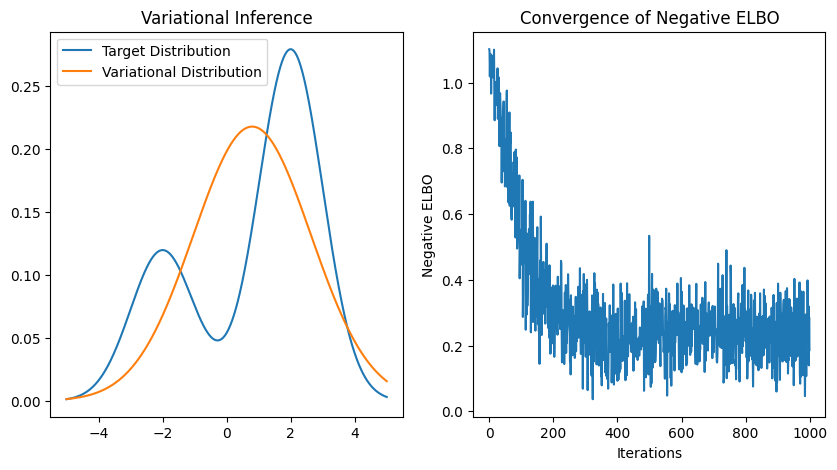

Final mu: 0.7981736660003662, Final sigma: 1.8312066793441772


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.distributions import Normal

# Target distribution (mixture of Gaussians)
def target_distribution(x):
    # log sigma primarily for numerical stability and to ensure the positivity constraint of the standard deviation.
    return 0.3 * torch.exp(Normal(-2, 1).log_prob(x)) + 0.7 * torch.exp(Normal(2, 1).log_prob(x))

# Log probability of the target distribution (for plotting purposes)
def log_target(x):
    return torch.log(target_distribution(x))


# Variational Inference with Reparameterization Trick
class VariationalInference:
    def __init__(self, learning_rate=0.01, num_iterations=500, num_samples=100):
        self.mu = torch.tensor(-2.0, requires_grad=True)
        
        self.log_sigma = torch.tensor(0.0, requires_grad=True)  # Use log_sigma for numerical stability
        self.optimizer = torch.optim.Adam([self.mu, self.log_sigma], lr=learning_rate)
        self.num_iterations = num_iterations
        self.num_samples = num_samples
        self.losses = []

    def variational_distribution(self, x):
        sigma = torch.exp(self.log_sigma)
        return Normal(self.mu, sigma).log_prob(x)

    def reparameterize(self):
        """Samples from q(z) using the reparameterization trick."""
        sigma = torch.exp(self.log_sigma)
        epsilon = torch.randn(self.num_samples)  # Standard normal noise
        z = self.mu + sigma * epsilon  # Reparameterized sample
        return z

    def loss(self):

        z = self.reparameterize()

        log_q_z = self.variational_distribution(z)
        log_p_z = log_target(z) #log of target distribution, defined above.

        # Minimize the KL (q(z)||p(z))
        return torch.mean(log_p_z - log_q_z) # E_q [ log q(z) -  log p(z)]


    def train(self):
        for i in range(self.num_iterations):
            self.optimizer.zero_grad()  # Reset gradients
            loss = -self.loss() # Minimize the KL (q(z)||p(z))
            loss.backward()  # Compute gradients
            self.optimizer.step()  # Update parameters
            self.losses.append(loss.item())

            if i % 50 == 0:
                print(f"Iteration {i}: ELBO = {-loss.item()}")  # Print the positive ELBO

    def plot_results(self):
        x_range = torch.linspace(-5, 5, 500)
        with torch.no_grad(): #no gradients needed for plotting
          target_probs = target_distribution(x_range).numpy()
          variational_probs = torch.exp(self.variational_distribution(x_range)).numpy()

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.plot(x_range.numpy(), target_probs, label="Target Distribution")
        plt.plot(x_range.numpy(), variational_probs, label="Variational Distribution")
        plt.legend()
        plt.title("Variational Inference")

        plt.subplot(1, 2, 2)
        plt.plot(self.losses)
        plt.xlabel("Iterations")
        plt.ylabel("Negative ELBO")
        plt.title("Convergence of Negative ELBO")
        plt.show()

        with torch.no_grad():
          print(f"Final mu: {self.mu.item()}, Final sigma: {torch.exp(self.log_sigma).item()}")


vi = VariationalInference(learning_rate=0.01, num_iterations=1000)
vi.train()
vi.plot_results()

# Bayesian neural network (BNN)


**Traditional NNs**

- Point Estimates and Overconfidence: NNs predict point estimates, like class probabilities, without quantifying uncertainty.  This leads to overconfident predictions, even on ambiguous or out-of-distribution (OOD) data.

    - Example: A medical diagnosis model might predict "95% cancer" with high confidence, even when the input is ambiguous or OOD. This overconfidence can lead to misdiagnosis and inappropriate treatment.
    - Consequence: Poor reliability in high-stakes decisions, especially in domains like healthcare, finance, and autonomous driving where understanding uncertainty is crucial. Overconfident predictions can lead to catastrophic failures.

![image.png](images/uncer.png)

ref image: https://neurosciences.univ-grenoble-alpes.fr/en/news/uncertainty-quantification-deep-learning-based-medical-image-segmentation

- Sensitivity to Overfitting: NNs are prone to overfitting, especially with limited data.  They can memorize training data, including noise, leading to poor generalization on unseen data.

    - Consequence: Poor performance on real-world data and difficulty in deploying models to new environments.
    - Consequence: Lack of insight into the range of possible outcomes and difficulty in understanding the model's sensitivity to different initializations or training data subsets.

### Bayesian Neural network

![bnn1.png](images/bnn1.png)

A Bayesian neural network is a probabilistic model that allows us to estimate uncertainty in predictions by representing the weights and biases of the network as probability distributions rather than fixed values. This allows us to incorporate prior knowledge about the weights and biases into the model and update our beliefs about them as we observe data.

BNNs combine the power of neural networks with the probabilistic framework of Bayesian inference. This allows us to quantify uncertainty in neural network predictions, which is critical for applications where reliability is paramount (e.g., medical imaging, self-driving cars).

#### **Core Idea: Weights as Distributions**

Traditional NN: Weights are fixed after training (e.g., 
$ \theta = \begin{bmatrix} 0.8 & 0.2 \\ 0.5 & 0.7 \end{bmatrix} $).

BNN: Weights are probability distributions (e.g., 
$ \theta \sim \mathcal{N} \left( \begin{bmatrix} 0.8 & 0.2 \\ 0.5 & 0.7 \end{bmatrix}, 
\begin{bmatrix} 0.1 & 0.05 \\ 0.07 & 0.08 \end{bmatrix} \right) $).

Posterior distribution: 
$$ P(\theta \mid D) \propto P(D \mid\theta) P(\theta) $$

1. **Posterior Distribution:**
   $$
   p(\theta | D) \propto p(D | \theta) p(\theta),
   $$
   where $p(D | \theta)$ is the likelihood, $p(\theta)$ is the prior, and $p(\theta | D)$ is the posterior distribution.

2. **Predictive Distribution:**

To make predictions in BNN, we use the distribution

   $$
   p(y | x, D) = \int p(y | x, \theta) p(\theta | D) d\theta.
   $$

which accounts for the uncertainty in the weights by integrating over the posterior distribution $p(\theta | D)$.

To estimate the (intractable) posterior distribution $p(\theta | D)$, we can use either Markov Chain Monte Carlo (MCMC) or Variational Inference (VI).

#### Training Bayesian Neural Networks with MCMC:

Metropolis hashing for BNN with MCMC

> **Algorithm:**
> Initialize weights $\theta_0$.
> 
> For $t = 1$ to $T$:
>    - Propose new weights $\theta'$ from a proposal distribution $q(\theta' | \theta_t)$.
>    - Compute the acceptance probability:
>      $$
>      A = \min \left( 1, \frac{q(\theta | \theta') p(\theta'|D)}{q(\theta' | \theta) p(\theta|D)} \right).
>      $$
>    - Accept $\theta'$ with probability $A$:
>      - If accepted, $\theta_{t+1} = \theta'$.
>      - Otherwise, $\theta_{t+1} = \theta_t$.


In [62]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

class BayesianNN_MCMC(nn.Module):
    def __init__(self):
        super(BayesianNN_MCMC, self).__init__()
        self.fc1 = nn.Linear(1, 20)

        self.fc2 = nn.Linear(20, 40)
        self.fc3 = nn.Linear(40, 1)


    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Define the prior and likelihood functions
def log_prior(weight):
    # Assume Gaussian prior
    return -0.5 * torch.sum(weight**2)

def log_likelihood(y_pred, y_true):
    # Assume Gaussian likelihood
    return -0.5 * torch.sum((y_pred - y_true)**2)

def log_posterior(model, x, y):
    # Compute the posterior as prior + likelihood
    log_prior_sum = sum(log_prior(param) for param in model.parameters())
    y_pred = model(x)
    log_likelihood_value = log_likelihood(y_pred, y)
    return log_prior_sum + log_likelihood_value

# MCMC Sampling Function
def mcmc_sampling(model, x, y, num_samples=1000, step_size=0.01):
    samples = []
    current_model = BayesianNN_MCMC()
    current_model.load_state_dict(model.state_dict())
    current_log_posterior = log_posterior(current_model, x, y)

    for i in range(num_samples):
        proposed_model = BayesianNN_MCMC()
        proposed_model.load_state_dict(current_model.state_dict())

        # Propose new weights
        for param in proposed_model.parameters():
            param.data += step_size * torch.randn_like(param)

        proposed_log_posterior = log_posterior(proposed_model, x, y)

        # Acceptance step
        acceptance_ratio = torch.exp(proposed_log_posterior - current_log_posterior)
        if torch.rand(1) < acceptance_ratio:
            current_model = proposed_model
            current_log_posterior = proposed_log_posterior

        samples.append({name: param.clone().detach() for name, param in current_model.state_dict().items()})

        if (i + 1) % 1000 == 0:
            print(f"MCMC Iteration {i + 1}/{num_samples}")

    return samples


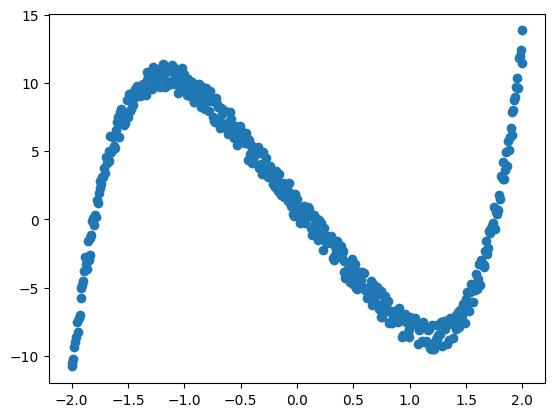

In [70]:
# Generate synthetic data
def clean_target(x):
    return x.pow(5) -10* x.pow(1)+1
def target(x):
    return x.pow(5) -10* x.pow(1) + 2*torch.rand(x.size())
x_train = torch.linspace(-2, 2, 500)
y_train = target(x_train)

x_train = torch.unsqueeze(x_train, dim=1)
y_train = torch.unsqueeze(y_train, dim=1)

# Test model on new inputs
x_test = torch.linspace(-2, 2, 300)
y_test = target(x_test)
real_y = clean_target(x_test)

real_y = torch.unsqueeze(real_y, dim=1)
x_test = torch.unsqueeze(x_test, dim=1)
y_test = torch.unsqueeze(y_test, dim=1)

plt.scatter(x_train.data.numpy(), y_train.data.numpy())
plt.show()

MCMC Iteration 1000/5000
MCMC Iteration 2000/5000
MCMC Iteration 3000/5000
MCMC Iteration 4000/5000
MCMC Iteration 5000/5000


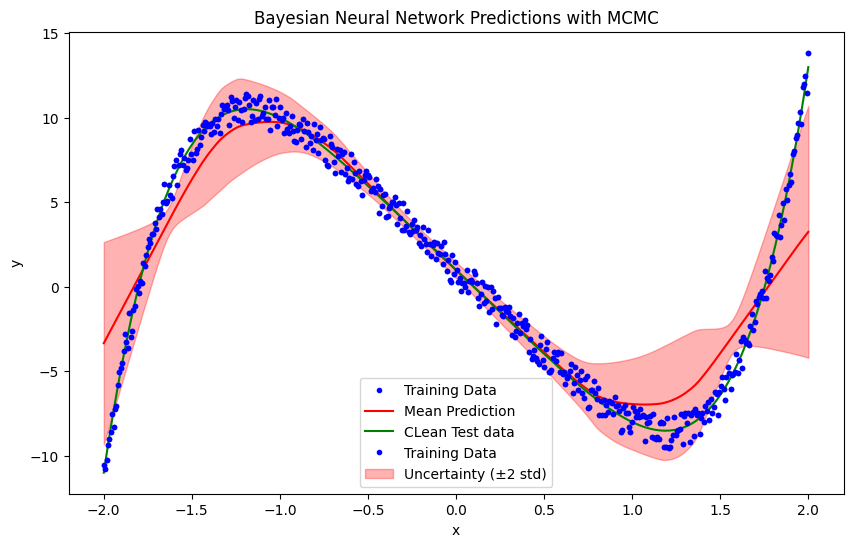

In [73]:

# # Generate Data

# Initialize the model
model_mcmc = BayesianNN_MCMC()

# Perform MCMC Sampling
num_samples = 5000
n_burnin = 1000
samples = mcmc_sampling(model_mcmc, x_train, y_train, num_samples)

# Monte Carlo Predictions
predictions = []

for sample in samples[n_burnin:]: 
    model_mcmc.load_state_dict(sample)
    predictions.append(model_mcmc(x_test).detach())

predictions = torch.stack(predictions)
mean_prediction = predictions.mean(0)
std_prediction = predictions.std(0)

# Plot Results
plt.figure(figsize=(10, 6))
plt.plot(x_train.numpy(), y_train.numpy(), 'b.', label='Training Data')
plt.plot(x_test.numpy(), mean_prediction.numpy(), 'r-', label='Mean Prediction')
plt.plot(x_test.numpy(), real_y.numpy(), 'g-', label='CLean Test data')
plt.plot(x_train.numpy(), y_train.numpy(), 'b.', label='Training Data')
plt.fill_between(x_test.squeeze().numpy(),
                 (mean_prediction - 2 * std_prediction).squeeze().numpy(),
                 (mean_prediction + 2 * std_prediction).squeeze().numpy(),
                 color='r', alpha=0.3, label='Uncertainty (±2 std)')
plt.title('Bayesian Neural Network Predictions with MCMC')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#### Training Bayesian Neural Networks with VI:

Bayesian Neural Networks (BNNs) extend standard neural networks by placing distributions over the weights instead of using point estimates. Variational Inference (VI) approximates the posterior distribution of these weights with a simpler distribution $ q(\theta) $.

- Given training data $ \mathcal{D} = \{(x_i, y_i)\}_{i=1}^{N} $, we define the likelihood:
  $$ p(y | x, \theta) $$
  where $ \theta $ represents the network weights.

- The posterior over weights:
  $$ p(\theta | \mathcal{D}) = \frac{p(\mathcal{D} | \theta) p(\theta)}{p(\mathcal{D})} $$

- VI approximates this with a variational posterior:
  $$ q(\theta) \approx p(\theta | \mathcal{D}) $$

- The ELBO objective is optimized:
  $$ \text{ELBO}(q) = \mathbb{E}_q[\log p(D| \theta)] - D_{KL}(q(\theta) || p(\theta)) $$

This balances likelihood maximization and prior regularization.

**KL Divergence Approximation:**

For KL Divergence Approximation we can assume prior distribution of $\theta$:

- $ q(\theta) = \mathcal{N}(\mu, \sigma^2) $ is the variational posterior,
- $ p(\theta) = \mathcal{N}(0,1) $ is the prior,
- $ \sigma $ is parameterized as $ \sigma = e^{\log\sigma} $.

$$ D_{KL}(q(\theta) || p(\theta))= D_{KL}(\mathcal{N}(\mu, \sigma^2) || \mathcal{N}(0,1))$$


### Reparameterization

https://stackoverflow.com/questions/60533150/what-is-the-difference-between-sample-and-rsample

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions import Normal

# PyTorch Implementation of Bayesian Neural Network with Variational Inference
class BayesianLinearVI(nn.Module):
    """
    Bayesian Linear Layer with Variational Inference.
    Each weight and bias follows a Gaussian distribution, parameterized by mean (mu) and log variance (log_sigma).
    """
    def __init__(self, in_features, out_features):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features
        
        # Mean and log variance of weights
        self.weight_mu = nn.Parameter(torch.randn(out_features, in_features))
        self.weight_sigma_log = nn.Parameter(torch.Tensor(out_features, in_features).normal_(-5, 0.1))
        
        # Mean and log variance of biases
        self.bias_mu = nn.Parameter(torch.randn(out_features))
        self.bias_sigma_log = nn.Parameter(torch.Tensor(out_features).normal_(-5, 0.1))
    
    def forward(self, x):
        """
        Forward pass with sampling from the variational distribution.
        Uses the reparameterization trick: sampled_weight = mu + exp(log_sigma) * epsilon
        """
        # using rsample
        weight = torch.distributions.Normal(self.weight_mu, torch.exp(self.weight_sigma_log)).rsample()

        # custom parameterization
        bias = self.bias_mu + torch.exp(self.bias_sigma_log)* torch.randn_like(self.bias_mu)
        return torch.matmul(x, weight.T) + bias
    

# Define Bayesian Neural Network
class BayesianNN_VI(nn.Module):
    """
    Bayesian Neural Network with Variational Inference.
    Two-layer MLP where each layer is a Bayesian linear layer.
    """
    def __init__(self):
        super().__init__()
        self.fc1 = BayesianLinearVI(1, 40) 
        self.fc2 = BayesianLinearVI(40, 40)  
        self.fc3= BayesianLinearVI(40, 1) 

    def kl_divergence(model):
        kl = 0.0
        prior = Normal(0, 1)
        for layer in model.modules():
            if isinstance(layer, BayesianLinearVI):
                q_weight = Normal(layer.weight_mu, torch.exp(layer.weight_sigma_log))
                q_bias = Normal(layer.bias_mu, torch.exp(layer.bias_sigma_log))
                kl += torch.sum(torch.distributions.kl_divergence(q_weight, prior))
                kl += torch.sum(torch.distributions.kl_divergence(q_bias, prior))
        return kl
    
    def forward(self, x):

        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)



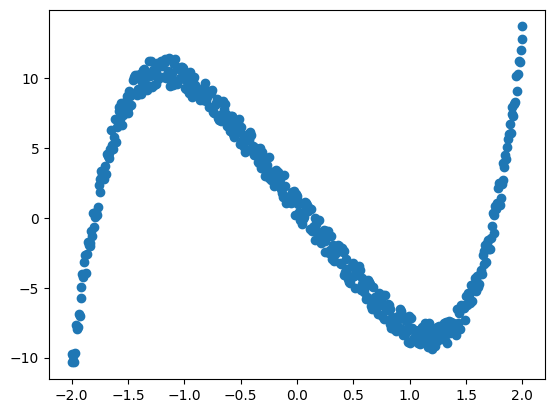

In [16]:
# Generate synthetic data
def clean_target(x):
    return x.pow(5) -10* x.pow(1)+1
def target(x):
    return x.pow(5) -10* x.pow(1) + 2*torch.rand(x.size())
x_train = torch.linspace(-2, 2, 500)
y_train = target(x_train)
x_train = torch.unsqueeze(x_train, dim=1)
y_train = torch.unsqueeze(y_train, dim=1)

# Test model on new inputs
x_test = torch.linspace(-2, 2, 300)
y_test = target(x_test)

x_test = torch.unsqueeze(x_test, dim=1)
y_test = torch.unsqueeze(y_test, dim=1)

plt.scatter(x_train.data.numpy(), y_train.data.numpy())
plt.show()

Epoch 0, Loss: 2517.0564, KL: 8838.7334
Epoch 1000, Loss: 9.6589, KL: 7549.1841
Epoch 2000, Loss: 7.6582, KL: 6480.1201
Epoch 3000, Loss: 6.3411, KL: 5539.0142
Epoch 4000, Loss: 5.9966, KL: 4804.8989
Epoch 5000, Loss: 4.9921, KL: 4322.4907


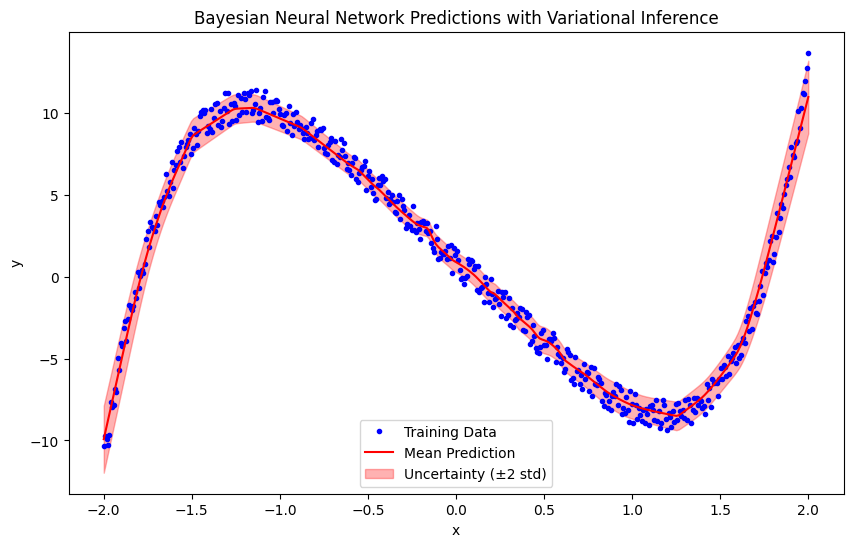

In [18]:

# Initialize Bayesian Neural Network
model_vi = BayesianNN_VI()
optimizer = optim.Adam(model_vi.parameters(), lr=0.001)  # Adam optimizer for gradient updates
loss_fn = nn.MSELoss()  # Mean Squared Error loss function

# Training the Bayesian Neural Network
for epoch in range(6000):
    optimizer.zero_grad()  # Reset gradients to zero before each update
    y_pred = model_vi(x_train)  # Forward pass
    
    # Compute ELBO:
    # ELBO = E_q[log p(D | θ)] - D_KL(q(θ) || p(θ))
    # The first term E_q[log p(D | θ)] is approximated by the MSE loss (negative log likelihood under Gaussian assumption)
    likelihood_term = loss_fn(y_pred, y_train)
    
    # Compute KL divergence between variational distribution q(θ) and prior p(θ)
    kl_divergence = model_vi.kl_divergence()
    # for param in model_vi.parameters():
    #     kl_divergence += torch.sum(0.5 * (torch.exp(2 * param) - 1 - 2 * param))
    
    # Total loss is negative ELBO
    kl_weight = 0.001
    loss = likelihood_term  + kl_weight*kl_divergence  # Scaling KL term to balance with likelihood
    loss.backward()  # Compute gradients
    optimizer.step()  # Update parameters
    
    if epoch % 1000 == 0:  # Print loss every 100 epochs
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}, KL: {kl_divergence.item():.4f}")



predictions = []

# Perform multiple forward passes to capture uncertainty
for _ in range(300):
    predictions.append(model_vi(x_test).detach())

predictions = torch.stack(predictions)
mean_prediction = predictions.mean(0)  # Compute mean prediction
std_prediction = predictions.std(0)  # Compute standard deviation (uncertainty)


# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x_train.numpy().reshape(-1), y_train.numpy(), 'b.', label='Training Data')
plt.plot(x_test.numpy().reshape(-1), mean_prediction.numpy(), 'r-', label='Mean Prediction')
plt.fill_between(x_test.squeeze().numpy(),
                 (mean_prediction - 2 * std_prediction).squeeze().numpy(),
                 (mean_prediction + 2 * std_prediction).squeeze().numpy(),
                 color='r', alpha=0.3, label='Uncertainty (±2 std)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Bayesian Neural Network Predictions with Variational Inference')
plt.legend()
plt.show()

### Monte Carlo Dropout (MC Dropout) as Variational Inference:

![mc_drop.png](images/mc_drop.png)

ref image: Hassan MM, Ahmed D. BAYESIAN DEEP LEARNING APPLIED TO LSTM MODELS FOR PREDICTING COVID-19 CONFIRMED CASES IN IRAQ. Science Journal of University of Zakho. 2023 Apr 11;11(2):170-8.

MC Dropout is a simple yet effective approximation of Bayesian inference in neural networks.
It provides uncertainty estimation by interpreting dropout as a variational approximation to the posterior distribution over network weights.

- We introduce a dropout mask $m_i \sim Bernoulli(p)$ for each layer's activations.
- The output of a layer with dropout applied can be written as:
  $$ f_{drop}(x) = m\cdot Wx + b $$
  where $m \sim Bernoulli(p)$.
- The variational distribution $q(m\cdot W)$ is implicitly defined through the dropout mechanism.
- The objective function is the **ELBO**:
  $$ \mathbb{E}_{q(m\cdot W)} [\log p(D | m\cdot W)] - D_{KL} (q(m\cdot W) || p(m\cdot W)) $$
  where $q(m\cdot W)$ represents the approximate posterior induced by dropout.
- At inference time, MC Dropout is performed by running multiple stochastic forward passes and computing the mean and variance of predictions.



**KL Divergence Approximation:**


- In practice, the KL divergence term $D_{KL} (q(m\cdot W) || p(m\cdot W))$ is approximated using L2 regularization:
  $$ D_{KL} (q(m\cdot W) || p(m\cdot W)) \approx \lambda \sum_{i} ||W_i||^2 $$
  where $W_i$ are the weights of the network, and $\lambda$ is a small regularization coefficient.


Epoch 0, Loss: 46.8772, KL: 0.0041
Epoch 1000, Loss: 1.9623, KL: 0.0643


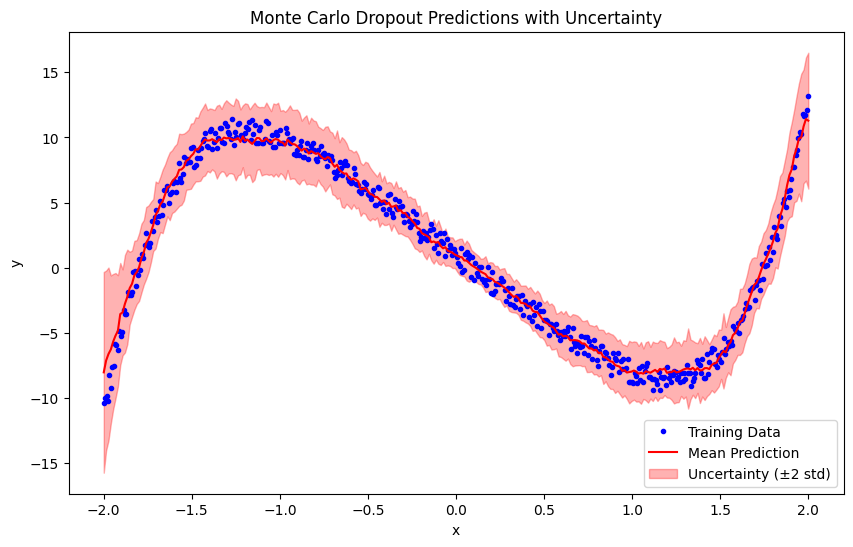

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions import Normal

# Define Monte Carlo Dropout Neural Network
class MCDropoutNN(nn.Module):
    """
    Monte Carlo Dropout Neural Network.
    Dropout layers are applied in both training and inference to approximate Bayesian inference.
    """
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 40)
        self.dropout = nn.Dropout(p=0.2)  # Dropout applied to activations
        self.fc2 = nn.Linear(40, 40)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(40, 1)
    
    def forward(self, x):
        """
        Forward pass through the network with dropout.
        Dropout remains active even during inference to enable Monte Carlo sampling.
        """
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  # Dropout is active in training and inference
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        return self.fc3(x)

# Generate synthetic data

def clean_target(x):
    return x.pow(5) -10* x.pow(1)+1
def target(x):
    return x.pow(5) -10* x.pow(1) + 2*torch.rand(x.size())
x_train = torch.linspace(-2, 2, 500)
y_train = target(x_train)
x_train = torch.unsqueeze(x_train, dim=1)
y_train = torch.unsqueeze(y_train, dim=1)

# Test model on new inputs
x_test = torch.linspace(-2, 2, 300)
y_test = target(x_test)

x_test = torch.unsqueeze(x_test, dim=1)
y_test = torch.unsqueeze(y_test, dim=1)



# Initialize MC Dropout model
model_mc_dropout = MCDropoutNN()
optimizer = optim.Adam(model_mc_dropout.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

# Training the MC Dropout Model
for epoch in range(2000):
    optimizer.zero_grad()
    y_pred = model_mc_dropout(x_train)  # Forward pass with dropout
    
    # Compute ELBO:
    # ELBO = E_q[log p(D | W)] - D_KL(q(W) || p(W))
    # The first term E_q[log p(D | W)] is approximated by the MSE loss (negative log-likelihood under Gaussian assumption)
    likelihood_term = loss_fn(y_pred, y_train)
    
    # Compute KL divergence term (L2 weight regularization as an approximation)
    kl_divergence = sum(torch.sum(param**2) for param in model_mc_dropout.parameters()) * 0.0001  # Weight decay as KL term
    
    # Total loss is negative ELBO
    loss = likelihood_term + kl_divergence  # Minimize negative ELBO
    loss.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}, KL: {kl_divergence.item():.4f}")

# Test model with Monte Carlo Dropout
predictions = []

# Perform multiple stochastic forward passes
for _ in range(100):  # 100 Monte Carlo samples
    predictions.append(model_mc_dropout(x_test).detach())

predictions = torch.stack(predictions)
mean_prediction = predictions.mean(0)  # Compute mean prediction
std_prediction = predictions.std(0)  # Compute standard deviation (uncertainty)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x_train.numpy(), y_train.numpy(), 'b.', label='Training Data')
plt.plot(x_test.numpy(), mean_prediction.numpy(), 'r-', label='Mean Prediction')
plt.fill_between(x_test.squeeze().numpy(),
                 (mean_prediction - 2 * std_prediction).squeeze().numpy(),
                 (mean_prediction + 2 * std_prediction).squeeze().numpy(),
                 color='r', alpha=0.3, label='Uncertainty (±2 std)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Monte Carlo Dropout Predictions with Uncertainty')
plt.legend()
plt.show()


# Probabilistic programming Tools


#### 1. Pyro

https://github.com/pyro-ppl/pyro

<img src="images/pyro.png" alt="drawing" width="200"/>

**Pyro** is a probabilistic programming language built on Python and **PyTorch**. Pyro programs are just Python programs, while its main inference technology is **stochastic variational inference**, which converts abstract probabilistic computations into concrete optimization problems solved with **stochastic gradient descent** in **PyTorch**, making probabilistic methods applicable to previously intractable model and dataset sizes.

#### 2. NumPyro

https://github.com/pyro-ppl/numpyro

NumPyro is a lightweight probabilistic programming library that provides a NumPy backend for Pyro. We rely on JAX for automatic differentiation and JIT compilation to GPU / CPU. NumPyro is under active development, so beware of brittleness, bugs, and changes to the API as the design evolves.

#### 3. PyMC

https://github.com/pymc-devs/pymc

<img src="images/pymc.png" alt="drawing" width="200"/>

PyMC is a probabilistic programming library designed for Bayesian inference. It is built on top of PyTensor (Therano fork) with can integrate with backend such as JAX and Numba.

#### 4. Tensorflow Probability

https://github.com/tensorflow/probability

TensorFlow Probability is a library for probabilistic reasoning and statistical analysis in TensorFlow. As part of the TensorFlow ecosystem, TensorFlow Probability provides integration of probabilistic methods with deep networks, gradient-based inference via automatic differentiation, and scalability to large datasets and models via hardware acceleration (e.g., GPUs) and distributed computation.